<a href="https://colab.research.google.com/github/parasgulati8/GradCAM-Analysis/blob/master/GradCAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ls

drive/  sample_data/


In [3]:
cd drive/My Drive/Colab Notebooks/dataset

/content/drive/My Drive/Colab Notebooks/dataset


In [0]:
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, BatchNormalization, PReLU
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

from vis.utils import utils
from vis.visualization import visualize_cam

In [0]:
data = np.load('subject1to40_4.npz')
train_data , y_train, test_data, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']

# test_data = np.load('s3_test.npz')
# test_data, y_test = test_data['X'], test_data['y']

In [0]:
# with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
model = load_model('deepCNN_v6_4G_s1to40_best_model.h5')

In [0]:
pip install tf-keras-vis tensorflow

In [9]:
sample = np.expand_dims(train_data[0], axis=0)
print(sample.shape)
y_pred = model.predict(sample)
print (np.argsort(y_pred.flatten())[::-1])
print('True value:', y_test[0], 'Predicted value:', y_pred)

(1, 600, 12, 1)
[0 1 3 2]
True value: [1 0 0 0] Predicted value: [[9.999840e-01 9.015454e-06 2.967107e-06 3.914699e-06]]


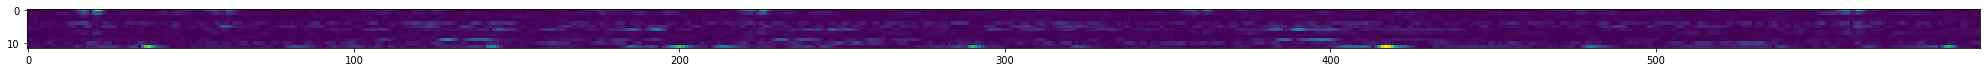

In [10]:
_img = train_data[0].T
plt.figure(figsize=(35,10))
plt.imshow(np.squeeze(_img))

In [11]:
pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-7725o_nz
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-7725o_nz
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38884 sha256=971a5f844b2e6c54c2aff3e95e188a47c47698eb74812b8f0aa7a7f46c76aeb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-sfleknzi/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.5.0
    Uninstalling keras-vis-0.5.0:
      Successfully uninstalled keras-vis-0.5.0


In [0]:
model.layers[-1].activation = K.activations.linear

In [15]:
print(_img.T.shape)

grad_top1 = visualize_cam(model, 32, 0, _img.T, penultimate_layer_idx=8, backprop_modifier=None, grad_modifier=None )
grad_top2 = visualize_cam(model, 32, 0, _img.T, penultimate_layer_idx=5, backprop_modifier=None, grad_modifier=None )

(600, 12, 1)


In [0]:
_img = np.expand_dims(_img, axis=2)

In [0]:
_img = np.squeeze(_img)

In [23]:
_img.T.shape

(600, 12, 1)

In [0]:
grad_top1

In [0]:
import pandas as pd

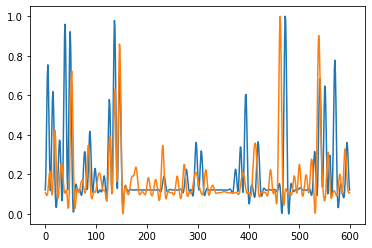

In [22]:
pd.Series(grad_top1).plot()
pd.Series(grad_top2).plot()

In [23]:
signal = np.squeeze(sample)
signal.shape

(600, 12)

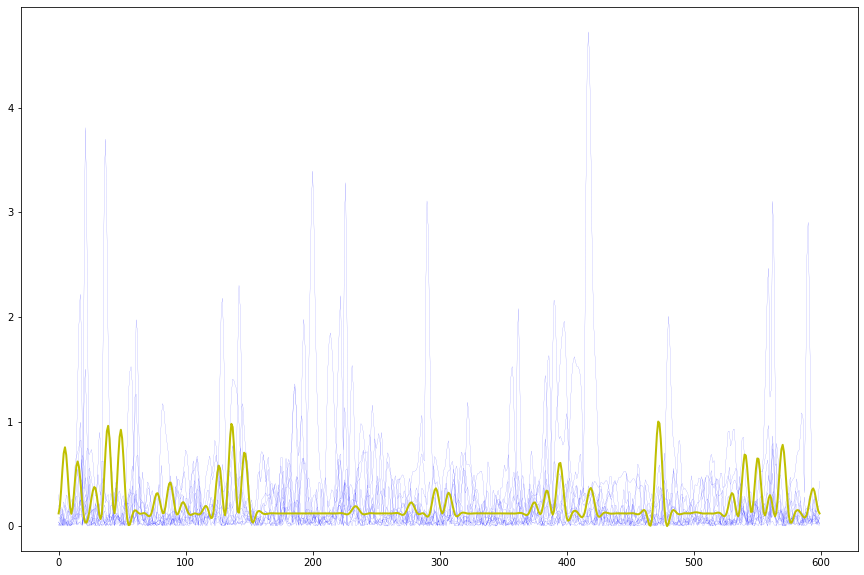

In [24]:
#Gesture 0
plt.figure(figsize=(15,10))
plt.plot(range(600), signal[:, 0], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 1], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 2], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 3], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 4], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 5], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 6], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 7], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 8], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 9], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 10], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 11], c='b', linewidth=0.1)
plt.plot(range(600), grad_top1, c='y', linewidth=2)
# plt.plot(range(600), grad_top2, c='r', linewidth=2)
plt.savefig('GradCAM2.jpg', format= 'jpg')

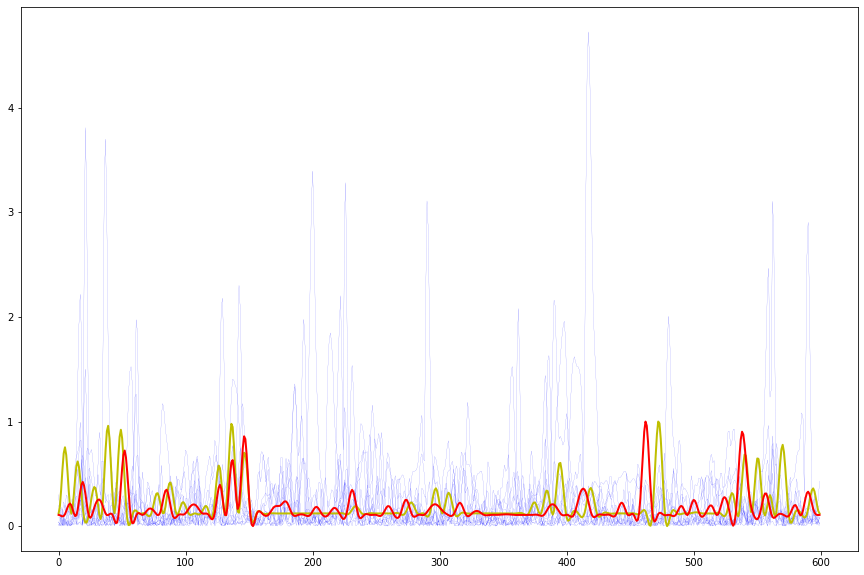

In [43]:
plt.figure(figsize=(15,10))
plt.plot(range(600), signal[:, 0], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 1], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 2], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 3], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 4], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 5], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 6], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 7], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 8], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 9], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 10], c='b', linewidth=0.1)
plt.plot(range(600), signal[:, 11], c='b', linewidth=0.1)
plt.plot(range(600), grad_top1, c='y', linewidth=2)
plt.plot(range(600), grad_top2, c='r', linewidth=2)

In [0]:
# from tf_keras_vis import gradcam
# gradcam.Gradcam(model, model_modifier=)

# from vis.utils import utils

# from keras.utils import CustomObjectScope
# from keras.initializers import glorot_uniform